## ARIMA_intro

> ARIMA
* 최대 7가지의 인자
* ARIMA(p,d,q)
* 계절성이있을시, ARIMA(p,d,q)(P,D,Q)m

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
airline =  pd.read_csv('./data/airline_passengers.csv', index_col='Month',parse_dates=True)

train = airline[:'1995']
test = airline['1960':]
y_hat = test.copy() # 원본 test데이터 오염방지위해)

In [3]:
import statsmodels.api as sm

In [4]:
arima = sm.tsa.statespace.SARIMAX(
    train['Thousands of Passengers'], # numpy배열로 넣지않고 그냥넣음
    order=(2,1,1), # p,d,q
    seasonal_order=(0,1,0,12), # P,D,Q  , M
    enforce_stationarity=False, # error 방지
    enforce_invertibility=False,# error 방지
)

C:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


> SARIMAX의 predict vs forecast
* predict => 예측할 데이터의 index를 인자로
* forecast => 예측할 데이터의 개수를 인자로

In [5]:
arima_result = arima.fit()

In [6]:
y_hat['ARIMA'] = arima_result.predict(start='1960-01-01',
                    end='1960-12-01',
                    dynamic=True # => arima모델은 원래 한 스탭씩밖에(ex. 1month씩) 예측못하는데 이 인자 통해 여러스탭 예측가능. 1스탭 예츠후 그 모델유지하면서 다음스텝으로 가는방식
                    )

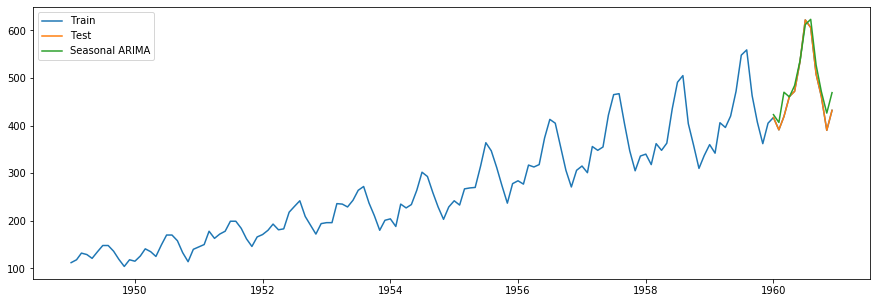

In [9]:
plt.figure(figsize=(15,5))
plt.plot(train['Thousands of Passengers'], label='Train')
plt.plot(test['Thousands of Passengers'], label='Test')
plt.plot(y_hat['ARIMA'], label='Seasonal ARIMA')
plt.legend()

In [8]:
from sklearn.metrics import mean_squared_error

RMSE = np.sqrt(
    mean_squared_error(test['Thousands of Passengers'],
                      y_hat['ARIMA'])
)

print(RMSE)

23.439720442366575
